In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
import os
from pathlib import Path
import sys

In [3]:
sys.path.append(str(Path().resolve().parent))
from path_manager import BATT_DATA_DIR, REF_NB, PLOT_DIR

In [4]:
DATA_DIR_M1_D1 = BATT_DATA_DIR / 'train' / 'method_1' / 'defensive_batch1'    ## M1 = method 1, D1 = defensive batch 1
DATA_DIR_M1_D2 = BATT_DATA_DIR / 'train' / 'method_1' / 'defensive_batch2'    ## M1 = method 1, D2 = defensive batch 2
DATA_DIR_M1_A1 = BATT_DATA_DIR /'train' / 'method_1' / 'assertive_batch1'    ## M1 = method 1, D1 = assertive batch 1
DATA_DIR_M1_A2 = BATT_DATA_DIR /'train' / 'method_1' / 'assertive_batch2'    ## M1 = method 1, D2 = assertive batch 2

DATA_DIR_M2_D1 = BATT_DATA_DIR /'train' / 'method_2' / 'defensive_batch1'    ## M1 = method 2, D1 = defensive batch 1
DATA_DIR_M2_D2 = BATT_DATA_DIR /'train' / 'method_2' / 'defensive_batch2'    ## M1 = method 2, D2 = defensive batch 2
DATA_DIR_M2_A1 = BATT_DATA_DIR /'train' / 'method_2' / 'assertive_batch1'    ## M1 = method 2, D1 = assertive batch 1
DATA_DIR_M2_A2 = BATT_DATA_DIR /'train' / 'method_2' / 'assertive_batch2'    ## M1 = method 2, D2 = assertive batch 2

RETEST_DIR_M1 = BATT_DATA_DIR /'train' / 'method_1'
RETEST_DIR_M2 = BATT_DATA_DIR /'train' / 'method_2'

In [5]:
batch1_def_up= pd.read_csv(DATA_DIR_M1_D1 / 'def_1_up.CSV')
batch1_def_down= pd.read_csv(DATA_DIR_M1_D1 / 'def_1_down.CSV')
batch1_def_flat= pd.read_csv(DATA_DIR_M1_D1 / 'def_1_flat.CSV')

In [6]:
batch2_def_up= pd.read_csv(DATA_DIR_M1_D2 / 'def_2_up.CSV')
batch2_def_down= pd.read_csv(DATA_DIR_M1_D2 / 'def_2_down.CSV')
batch2_def_flat= pd.read_csv(DATA_DIR_M1_D2 / 'def_2_flat.CSV')

In [7]:
batch1_asser_up= pd.read_csv(DATA_DIR_M1_A1 / 'asser1_up.CSV')
batch1_asser_down= pd.read_csv(DATA_DIR_M1_A1 / 'asser1_down.CSV')
batch1_asser_flat= pd.read_csv(DATA_DIR_M1_A1 / 'asser1_flat.CSV')

In [8]:
batch2_asser_up= pd.read_csv(DATA_DIR_M1_A2 / 'asser2_up.CSV')
batch2_asser_down= pd.read_csv(DATA_DIR_M1_A2 / 'asser2_down.CSV')
batch2_asser_flat= pd.read_csv(DATA_DIR_M1_A2 / 'asser2_flat.CSV')

In [9]:
all_batch1_def_up= pd.read_csv(DATA_DIR_M2_D1 / 'def1_up_all.CSV')
all_batch1_def_down= pd.read_csv(DATA_DIR_M2_D1 / 'def1_down_all.CSV')
all_batch1_def_flat= pd.read_csv(DATA_DIR_M2_D1 / 'def1_flat_all.CSV')

In [10]:
all_batch2_def_up= pd.read_csv(DATA_DIR_M2_D2 / 'def2_up_all.CSV')
all_batch2_def_down= pd.read_csv(DATA_DIR_M2_D2 / 'def2_down_all.CSV')
all_batch2_def_flat= pd.read_csv(DATA_DIR_M2_D2 / 'def2_flat_all.CSV')

In [11]:
all_batch1_asser_up= pd.read_csv(DATA_DIR_M2_A1 / 'asser1_up_all.CSV')
all_batch1_asser_down= pd.read_csv(DATA_DIR_M2_A1 / 'asser1_down_all.CSV')
all_batch1_asser_flat= pd.read_csv(DATA_DIR_M2_A1 / 'asser1_flat_all.CSV')

In [12]:
all_batch2_asser_up= pd.read_csv(DATA_DIR_M2_A2 / 'asser2_up_all.CSV')
all_batch2_asser_down= pd.read_csv(DATA_DIR_M2_A2 / 'asser2_down_all.CSV')
all_batch2_asser_flat= pd.read_csv(DATA_DIR_M2_A2 / 'asser2_flat_all.CSV')

In [13]:
##for the restested profiles
replaced_asser11_sep= pd.read_csv(RETEST_DIR_M1 / 'restest_method1.CSV')
replaced_asser11_alltog= pd.read_csv(RETEST_DIR_M2 /'restest_method2.CSV')

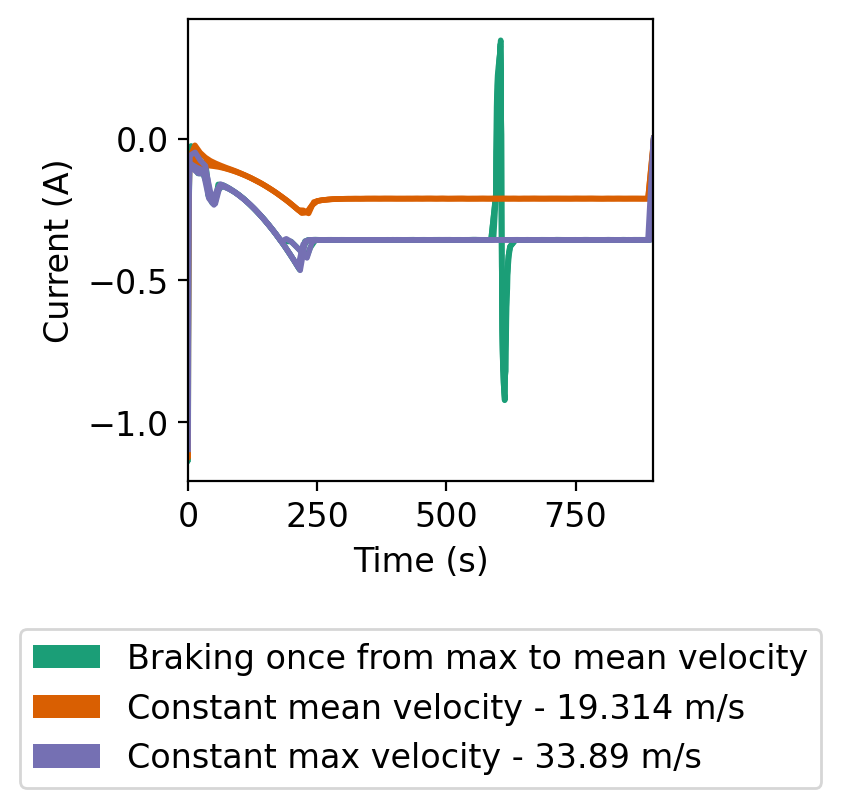

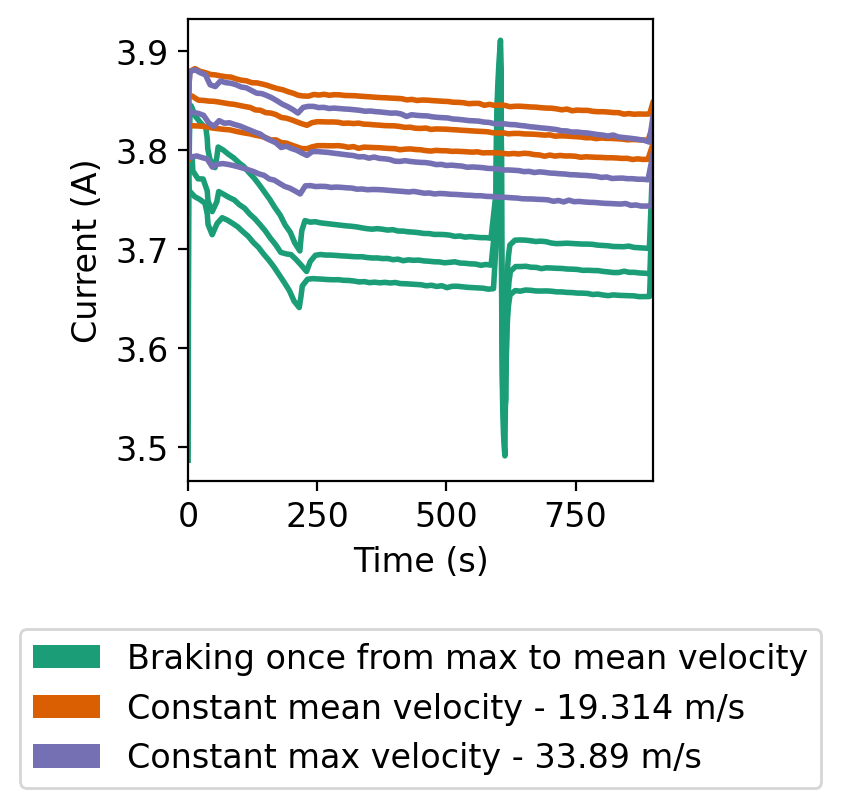

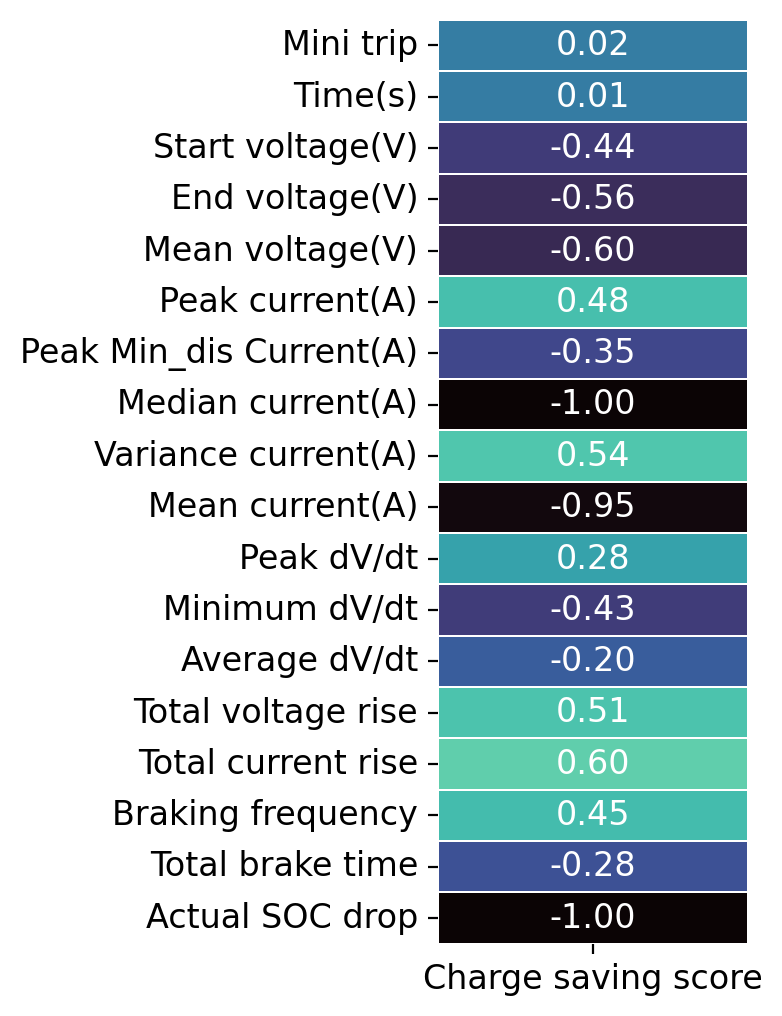

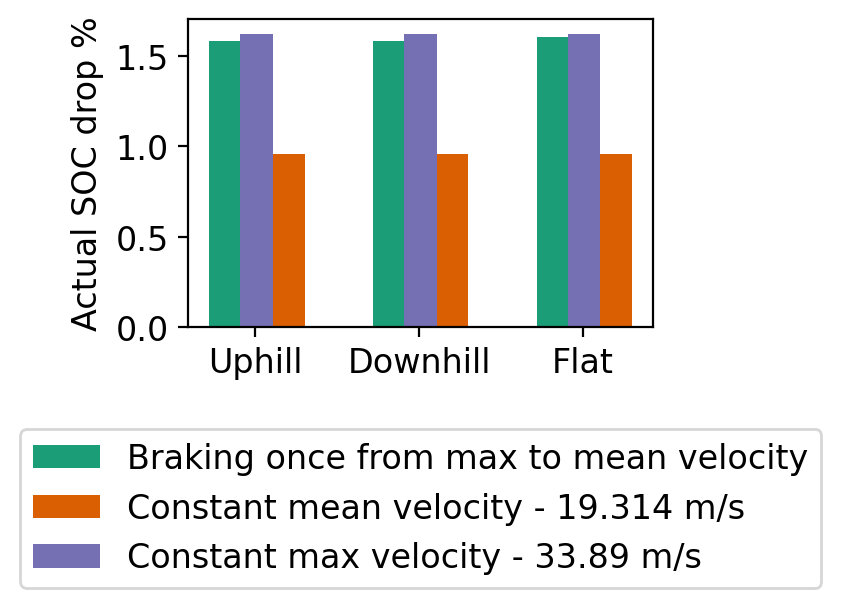

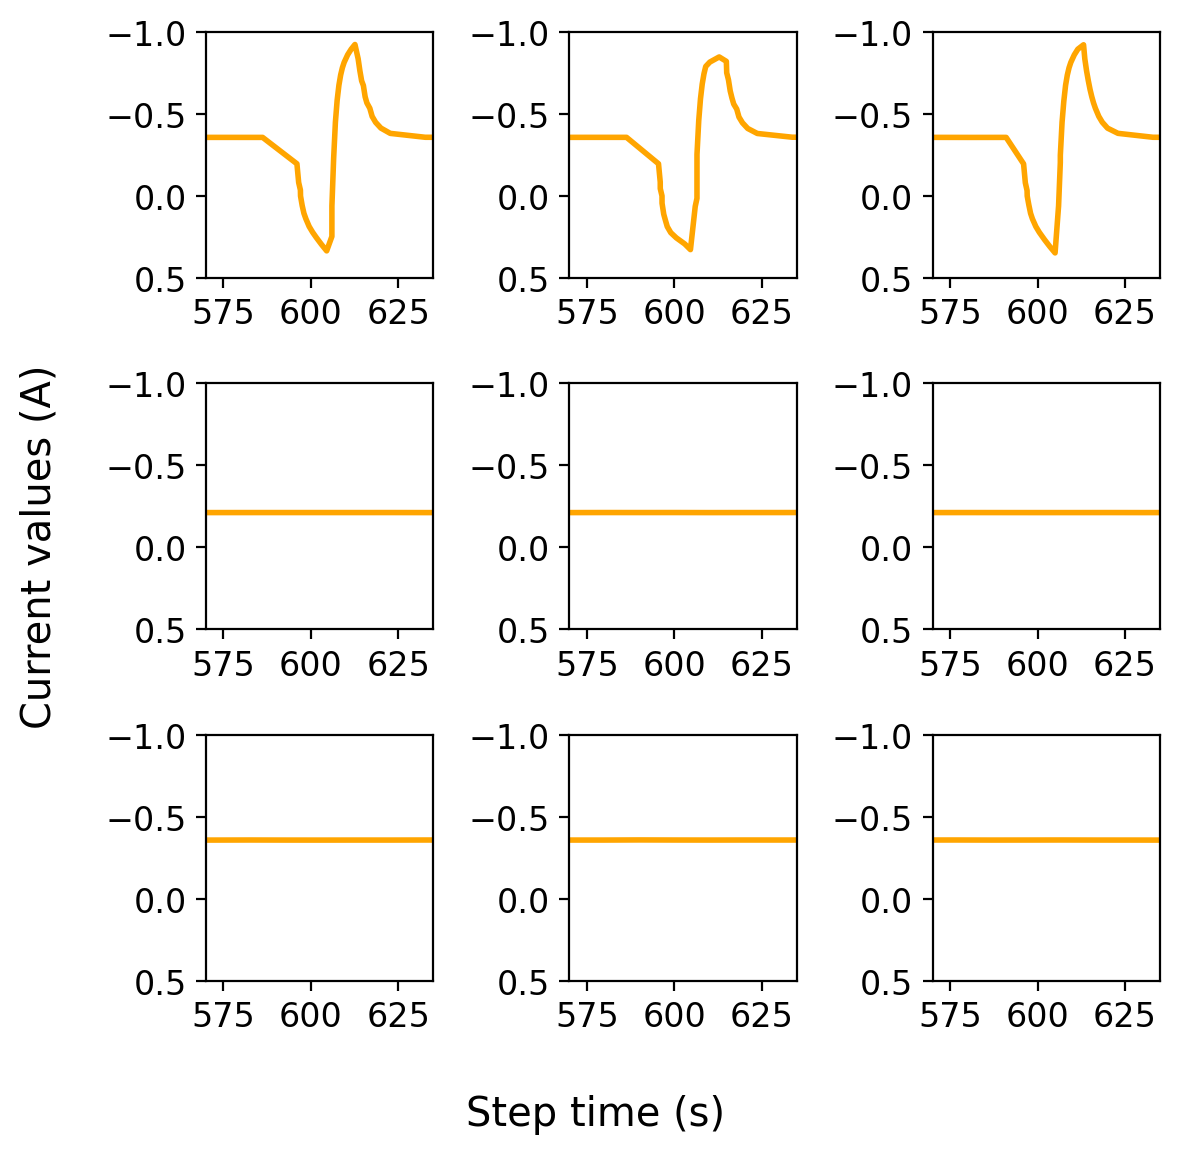

In [14]:
%run {REF_NB}

In [15]:
def dataframe_separate_gen(df):
    dr1_df= df[df['Step Index']==6].reset_index(drop=True)
    dr2_df= df[df['Step Index']==10].reset_index(drop=True)
    dr3_df= df[df['Step Index']==14].reset_index(drop=True)
    dr4_df= df[df['Step Index']==18].reset_index(drop=True)
    return dr1_df, dr2_df, dr3_df, dr4_df

def dataframe_together_gen(df):
    dr1_df= df[df['Step Index']==6].reset_index(drop=True)
    dr2_df= df[df['Step Index']==7].reset_index(drop=True)
    dr3_df= df[df['Step Index']==8].reset_index(drop=True)
    dr4_df= df[df['Step Index']==9].reset_index(drop=True)
    return dr1_df, dr2_df, dr3_df, dr4_df

##For replaced velocity profile
def dataframe_separate_gen_replaced(df):
    dr_asserm11_df_up= df[df['Step Index']==6].reset_index(drop=True)
    dr_asserm11_df_down= df[df['Step Index']==10].reset_index(drop=True)
    dr_asserm11_df_flat= df[df['Step Index']==14].reset_index(drop=True)
    return dr_asserm11_df_up, dr_asserm11_df_down, dr_asserm11_df_flat

def dataframe_together_gen_replaced(df):
    dr_asserm11_df_up= df[df['Step Index']==6].reset_index(drop=True)
    dr_asserm11_df_down= df[df['Step Index']==7].reset_index(drop=True)
    dr_asserm11_df_flat= df[df['Step Index']==8].reset_index(drop=True)

    return dr_asserm11_df_up, dr_asserm11_df_down, dr_asserm11_df_flat

def dict_gen():
    list_arr=[]
    dr25_rep, dr29_rep, dr33_rep = dataframe_separate_gen_replaced(replaced_asser11_sep)
    dr73_rep, dr77_rep, dr81_rep = dataframe_together_gen_replaced(replaced_asser11_alltog)
    dr1, dr2, dr3, dr4 = dataframe_separate_gen(batch1_def_up)
    dr5, dr6, dr7, dr8 = dataframe_separate_gen(batch1_def_down)
    dr9, dr10, dr11, dr12 = dataframe_separate_gen(batch1_def_flat)
    dr13, dr38, dr15, dr16 = dataframe_separate_gen(batch2_def_up)
    dr17, dr42, dr19, dr20 = dataframe_separate_gen(batch2_def_down)
    dr21, dr46, dr23, dr24 = dataframe_separate_gen(batch2_def_flat)
    dr25, dr26, dr27, dr28 = dataframe_separate_gen(batch1_asser_up)
    dr29, dr30, dr31, dr32 = dataframe_separate_gen(batch1_asser_down)
    dr33, dr34, dr35, dr36 = dataframe_separate_gen(batch1_asser_flat)
    dr37, dr14, dr39, dr40 = dataframe_separate_gen(batch2_asser_up)
    dr41, dr18, dr43, dr44 = dataframe_separate_gen(batch2_asser_down)
    dr45, dr22, dr47, dr48 = dataframe_separate_gen(batch2_asser_flat)
    
    dr49, dr50, dr51, dr52 = dataframe_together_gen(all_batch1_def_up)
    dr53, dr54, dr55, dr56 = dataframe_together_gen(all_batch1_def_down)
    dr57, dr58, dr59, dr60 = dataframe_together_gen(all_batch1_def_flat)
    dr61, dr86, dr63, dr64 = dataframe_together_gen(all_batch2_def_up)
    dr65, dr90, dr67, dr68 = dataframe_together_gen(all_batch2_def_down)
    dr69, dr94, dr71, dr72 = dataframe_together_gen(all_batch2_def_flat)
    dr73, dr74, dr75, dr76 = dataframe_together_gen(all_batch1_asser_up)
    dr77, dr78, dr79, dr80 = dataframe_together_gen(all_batch1_asser_down)
    dr81, dr82, dr83, dr84 = dataframe_together_gen(all_batch1_asser_flat)
    dr85, dr62, dr87, dr88 = dataframe_together_gen(all_batch2_asser_up)
    dr89, dr66, dr91, dr92 = dataframe_together_gen(all_batch2_asser_down)
    dr93, dr70, dr95, dr96 = dataframe_together_gen(all_batch2_asser_flat)

    list_arr.extend([
    dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10,
    dr11, dr12, dr13, dr14, dr15, dr16, dr17, dr18, dr19, dr20,
    dr21, dr22, dr23, dr24, dr25_rep, dr26, dr27, dr28, dr29_rep, dr30,
    dr31, dr32, dr33_rep, dr34, dr35, dr36, dr37, dr38, dr39, dr40,
    dr41, dr42, dr43, dr44, dr45, dr46, dr47, dr48, dr49, dr50,
    dr51, dr52, dr53, dr54, dr55, dr56, dr57, dr58, dr59, dr60,
    dr61, dr62, dr63, dr64, dr65, dr66, dr67, dr68, dr69, dr70,
    dr71, dr72, dr73_rep, dr74, dr75, dr76, dr77_rep, dr78, dr79, dr80,
    dr81_rep, dr82, dr83, dr84, dr85, dr86, dr87, dr88, dr89, dr90,
    dr91, dr92, dr93, dr94, dr95, dr96
    ])
    dict={}
    for d in range (1,97):
        dict[d]= list_arr[d-1]
    return dict

In [16]:
dict= dict_gen()
dict

{1:      Data Point                  Date Time  Test Time (s)  Step Time (s)  \
 0            36  \t03/13/2024 21:50:37.895      1055.0553         0.0097   
 1            37  \t03/13/2024 21:50:37.907      1055.0674         0.0218   
 2            38  \t03/13/2024 21:50:38.263      1055.4242         0.3786   
 3            39  \t03/13/2024 21:50:38.393      1055.5537         0.5081   
 4            40  \t03/13/2024 21:50:38.891      1056.0514         1.0058   
 ..          ...                        ...            ...            ...   
 118         154  \t03/13/2024 22:04:10.509      1867.6698       812.6242   
 119         155  \t03/13/2024 22:04:20.509      1877.6700       822.6244   
 120         156  \t03/13/2024 22:04:21.405      1878.5661       823.5205   
 121         157  \t03/13/2024 22:04:26.424      1883.5846       828.5390   
 122         158  \t03/13/2024 22:04:36.425      1893.5854       838.5398   
 
      Cycle Index  Step Index  TC_Counter1  TC_Counter2  TC_Counter3  \

In [17]:
def create_database1():
    info_data= pd.DataFrame({'Mini_trip': range(1, 97)})
    arr_batch=[]
    arr_driver=[]
    n=1
    d=1
    batch_num= 4  ##Number of batches
    for i in range (0, len(info_data), 12):
        for j in range (i, i+12):
            arr_batch.append(n)
            arr_driver.append((j%4)+d)
        d=d+4
        n=n+1
        if n>4:
            n=1
        if d> (batch_num*4):
            d=1
    
    info_data['Batch']= arr_batch
    info_data['Driver']= arr_driver

    arr_road=[]
    arr_method=[]
    m=1
    t=1
    for terr in range (0, len(info_data), 4):
        for terr_2 in range (terr, terr+4):
            arr_road.append(t)
        t=t+1
        if t>3:
            t=1
    for road in range (len(info_data)): 
        if road == (len(info_data))/2:
            m=m+1
        arr_method.append(m)
    info_data['Terrain']= arr_road
    info_data['Method']= arr_method
    info_data['Driver Type']= 0
    for c in range (len(info_data)):
        if info_data['Driver'].iloc[c] <9:
            info_data['Driver Type'].iloc[c]= 1
        else:
            info_data['Driver Type'].iloc[c]= 2

    info_data.to_csv('Information data.csv', index= False)
    return info_data

There are total 96 Minitrips- 16 drivers- 4 batches - 3 road terrains- 2 methods

Terrain '1' = Uphill
Terrain '2' = Downhill
Terrain '3' = Flat Plane

Method '1'= Rest and Charge in between trips
Method '2' = No rest or charging phase

defresive Driver = 1 in Driver Type
asser Driver is -1 in Driver Type

In [18]:
##data1= create_database1()
data1= pd.read_csv(MISC_DIR / 'Information data.csv')

In [19]:
data1['Classification']= 0
for mt in range(len(data1)):
    if data1['Driver Type'].iloc[mt]==1 and data1['Terrain'].iloc[mt]==1:
        data1['Classification'].iloc[mt]= 'def_Up'
    if data1['Driver Type'].iloc[mt]==1 and data1['Terrain'].iloc[mt]==2:
        data1['Classification'].iloc[mt]= 'def_Down'
    if data1['Driver Type'].iloc[mt]==1 and data1['Terrain'].iloc[mt]==3:
        data1['Classification'].iloc[mt]= 'def_Flat'
    if data1['Driver Type'].iloc[mt]==2 and data1['Terrain'].iloc[mt]==1:
        data1['Classification'].iloc[mt]= 'asser_Up'
    if data1['Driver Type'].iloc[mt]==2 and data1['Terrain'].iloc[mt]==2:
        data1['Classification'].iloc[mt]= 'asser_Down'
    if data1['Driver Type'].iloc[mt]==2 and data1['Terrain'].iloc[mt]==3:
        data1['Classification'].iloc[mt]= 'asser_Flat'

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_17188/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_17188/32172

In [20]:
info_data_2 =pd.DataFrame()
info_data_2['Mini Trip']= dict.keys()

In [21]:
def dis_cap_drop(df):
    total= 0
    for ind in range (1, len(df)):
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        curr= df['Current (A)'].iloc[ind]
        total= total+ ((time_diff*curr)/3600)
    return total

In [22]:
def currdrop_sum(df):
    total= 0
    for ind in range (10, len(df)):
        curr_curr= df['Current (A)'].iloc[ind]
        if ((df['Current (A)'].iloc[ind-1])< curr_curr):
            diff= (curr_curr) - (df['Current (A)'].iloc[ind-1])
            total = total+diff
    return total

In [23]:
def brake_calc(df):
    count= 0
    for ind in range (2, len(df)):
        present_current_val= (df['Current (A)'].iloc[ind])-(df['Current (A)'].iloc[ind-1])
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        present_current_val_2= (df['Current (A)'].iloc[ind-1])-(df['Current (A)'].iloc[ind-2])
        time_diff_2= (df['Step Time (s)'].iloc[ind-1])-(df['Step Time (s)'].iloc[ind-2])
        didt= present_current_val/time_diff
        didt_2= present_current_val_2/time_diff_2
        if (didt>0 and didt_2<0):
            count= count+1
    return count

In [24]:
def brake_time_calc(df):
    tot_time_arr=[]
    for indd in range (32, len(df)):
        present_current_val= (df['Current (A)'].iloc[indd])-(df['Current (A)'].iloc[indd-1])
        time_diff= (df['Step Time (s)'].iloc[indd])-(df['Step Time (s)'].iloc[indd-1])
        check_curr_1= df['Current (A)'].iloc[indd-2]
        check_curr_2= df['Current (A)'].iloc[indd-1]
        check_curr_3= df['Current (A)'].iloc[indd]
        present_current_val_2= (df['Current (A)'].iloc[indd-1])-(df['Current (A)'].iloc[indd-2])
        time_diff_2= (df['Step Time (s)'].iloc[indd-1])-(df['Step Time (s)'].iloc[indd-2])
        didt= present_current_val/time_diff
        didt_2= present_current_val_2/time_diff_2
        if (check_curr_3>check_curr_2 and check_curr_2>check_curr_1):
            tot_time= time_diff_2
            tot_time_arr.append(tot_time)
    total_time_brake= sum(tot_time_arr)
    return total_time_brake

In [25]:
def volt_sum(df):
    total= 0
    for ind in range (10, len(df)):
        curr_volt= df['Voltage (V)'].iloc[ind]
        if ((df['Voltage (V)'].iloc[ind-1])< curr_volt):
            diff= (curr_volt) - (df['Voltage (V)'].iloc[ind-1])
            total = total+diff
    return total

In [26]:
def dis_cap_drop_area(df):
    time_array=[]
    curr_array=[]
    for ind in range (1, len(df)):
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        time_array.append (time_diff)
        curr= df['Current (A)'].iloc[ind]
        curr_array.append(curr)
    timenp= np.array(time_array)
    currnp= np.array(curr_array)
    integration = np.trapz(currnp, timenp)
    return (integration/3600)

In [27]:
def cut_time(df, s, t):
    ##for i in range (len(df)):
      ##  if df['Step Time (s)'].iloc[i]< t:
     ##       time = t
    df_2 = df[df['Step Time (s)'] >= s]
    limited_data = df_2[df_2['Step Time (s)'] <= t]
    return limited_data

In [28]:
def find_time_vpercentile(df):   ##Make sure you do a time difference of 10% each 
    timediff_arr=[]
    volt_arr=[]
    time10=0
    time20=0
    time30=0
    time40=0
    time50=0
    time60=0
    time70=0
    time80=0
    time90=0
    time100=0
    for i in range (1,len(df)):
        volt= df['Voltage (V)'].iloc[i]
        volt_arr.append(volt)
        timediff= (df['Step Time (s)'].iloc[i])- (df['Step Time (s)'].iloc[i-1])
        timediff_arr.append(timediff)
    timediffnp= np.array(timediff_arr)
    voltnp= np.array(volt_arr)
    perc10= np.percentile(voltnp, 10)
    perc20= np.percentile(voltnp, 20)
    perc30= np.percentile(voltnp, 30)
    perc40= np.percentile(voltnp, 40)
    perc50= np.percentile(voltnp, 50)
    perc60= np.percentile(voltnp, 60)
    perc70= np.percentile(voltnp, 70)
    perc80= np.percentile(voltnp, 80)
    perc90= np.percentile(voltnp, 90)
    perc100= np.percentile(voltnp, 100)
    for j in range (len(volt_arr)):
        if voltnp[j]<= perc10:
            time10= time10+ (timediffnp[j])
        if voltnp[j]<= perc20:
            time20= time20+ (timediffnp[j])
        if voltnp[j]<= perc30:
            time30= time30+ (timediffnp[j])
        if voltnp[j]<= perc40:
            time40= time40+ (timediffnp[j])
        if voltnp[j]<= perc50:
            time50= time50+ (timediffnp[j])
        if voltnp[j]<= perc60:
            time60= time60+ (timediffnp[j])
        if voltnp[j]<= perc70:
            time70= time70+ (timediffnp[j])
        if voltnp[j]<= perc80:
            time80= time80+ (timediffnp[j])
        if voltnp[j]<= perc90:
            time90= time90+ (timediffnp[j])
        if voltnp[j]<= perc100:
            time100= time100+ (timediffnp[j])
    time10_20= time20- time10
    time20_30= time30- time20
    time30_40= time40- time30
    time40_50= time50- time40
    time50_60= time60- time50
    time60_70= time70- time60
    time70_80= time80- time70
    time80_90= time90- time80
    time90_100= time100- time90
    return time10, time10_20, time20_30, time30_40, time40_50, time50_60, time60_70, time70_80, time80_90, time90_100

In [29]:
def find_time_cpercentile(df):   ##Make sure you do a time difference of 10% each 
    timediff_arr=[]
    curr_arr=[]
    time10=0
    time20=0
    time30=0
    time40=0
    time50=0
    time60=0
    time70=0
    time80=0
    time90=0
    time100=0
    for i in range (1,len(df)-10):
        current= df['Current (A)'].iloc[i]
        curr_arr.append(current)
        timediff= (df['Step Time (s)'].iloc[i])- (df['Step Time (s)'].iloc[i-1])
        timediff_arr.append(timediff)
    timediffnp= np.array(timediff_arr)
    currnp= np.array(curr_arr)
    perc10= np.percentile(currnp, 10)
    perc20= np.percentile(currnp, 20)
    perc30= np.percentile(currnp, 30)
    perc40= np.percentile(currnp, 40)
    perc50= np.percentile(currnp, 50)
    perc60= np.percentile(currnp, 60)
    perc70= np.percentile(currnp, 70)
    perc80= np.percentile(currnp, 80)
    perc90= np.percentile(currnp, 90)
    perc100= np.percentile(currnp, 100)
    for j in range (len(curr_arr)):
        if currnp[j]<= perc10:
            time10= time10+ (timediffnp[j])
        if currnp[j]<= perc20:
            time20= time20+ (timediffnp[j])
        if currnp[j]<= perc30:
            time30= time30+ (timediffnp[j])
        if currnp[j]<= perc40:
            time40= time40+ (timediffnp[j])
        if currnp[j]<= perc50:
            time50= time50+ (timediffnp[j])
        if currnp[j]<= perc60:
            time60= time60+ (timediffnp[j])
        if currnp[j]<= perc70:
            time70= time70+ (timediffnp[j])
        if currnp[j]<= perc80:
            time80= time80+ (timediffnp[j])
        if currnp[j]<= perc90:
            time90= time90+ (timediffnp[j])
        if currnp[j]<= perc100:
            time100= time100+ (timediffnp[j])
    time10_20= time20- time10
    time20_30= time30- time20
    time30_40= time40- time30
    time40_50= time50- time40
    time50_60= time60- time50
    time60_70= time70- time60
    time70_80= time80- time70
    time80_90= time90- time80
    time90_100= time100- time90
    return time10, time10_20, time20_30, time30_40, time40_50, time50_60, time60_70, time70_80, time80_90, time90_100

In [30]:
def dis_cap_drop_tester(df):
    dis_drop= (df['Discharge Capacity (Ah)'].iloc[0])- (df['Discharge Capacity (Ah)'].iloc[-1])
    return dis_drop

In [31]:
def features_ext(dict):
    time_arr=[]
    start_volts_arr=[]
    end_volts_arr=[]
    peak_curr_arr=[]
    min_curr_arr=[]
    discharge_arr=[]
    mean_volts_arr=[]
    med_curr_arr=[]
    soc_cc_arr=[]
    max_dvdt_arr=[]
    min_dvdt_arr=[]
    avg_dvdt_arr=[]
    discharge_area_arr=[]
    soc_area=[]
    t10_arr=[]
    t20_arr=[]
    t30_arr=[]
    t40_arr=[]
    t50_arr=[]
    t60_arr=[]
    t70_arr=[]
    t80_arr=[]
    t90_arr=[]
    t100_arr=[]
    tc10_arr=[]
    tc20_arr=[]
    tc30_arr=[]
    tc40_arr=[]
    tc50_arr=[]
    tc60_arr=[]
    tc70_arr=[]
    tc80_arr=[]
    tc90_arr=[]
    tc100_arr=[]
    dis_drop_tester_arr=[]
    volt_rise=[]
    curr_rise_arr=[]
    brakes=[]
    brake_time_arr=[]
    var_curr_arr=[]
    mean_curr_arr=[]
    for key in dict.keys():
        time= (dict[key]['Step Time (s)'].max())-(dict[key]['Step Time (s)'].min())
        time_arr.append(time)
        start_volts= dict[key]['Voltage (V)'].iloc[0]
        end_volts= dict[key]['Voltage (V)'].iloc[-1]
        mean_volts= dict[key]['Voltage (V)'].mean()
        start_volts_arr.append(start_volts)
        end_volts_arr.append(end_volts)
        mean_volts_arr.append(mean_volts)
        peak_curr= dict[key]['Current (A)'].max() 
        min_curr= dict[key]['Current (A)'].min()
        med_curr= dict[key]['Current (A)'].median()
        med_curr_arr.append(med_curr)
        var_curr= dict[key]['Current (A)'].var()
        var_curr_arr.append(var_curr)
        mean_curr= dict[key]['Current (A)'].mean()
        mean_curr_arr.append(mean_curr)
        peak_curr_arr.append(peak_curr)
        min_curr_arr.append(min_curr)
        discharge= dis_cap_drop(dict[key])
        discharge_int= dis_cap_drop_area(dict[key])
        soc_cc= (discharge/(3))*100
        soc_cc_area= (discharge_int/(3))*100
        soc_cc_arr.append(soc_cc)
        soc_area.append(soc_cc_area)
        discharge_arr.append(discharge)
        discharge_area_arr.append(discharge_int)
        max_dvdt= dict[key]['dV/dt (V/s)'].max() 
        max_dvdt_arr.append(max_dvdt)
        min_dvdt= dict[key]['dV/dt (V/s)'].min() 
        min_dvdt_arr.append(min_dvdt)
        avg_dvdt= dict[key]['dV/dt (V/s)'].mean() 
        avg_dvdt_arr.append(avg_dvdt)
        sum_volt_rise= volt_sum(dict[key])
        volt_rise.append(sum_volt_rise)
        curr_rise= currdrop_sum(dict[key])
        curr_rise_arr.append(curr_rise)
        # t10, t10_20, t20_30, t30_40, t40_50, t50_60, t60_70, t70_80, t80_90, t90_100= find_time_vpercentile(dict[key])
        # tc10, tc10_20, tc20_30, tc30_40, tc40_50, tc50_60, tc60_70, tc70_80, tc80_90, tc90_100= find_time_cpercentile(dict[key])
        # t10_arr.append(t10)
        # t20_arr.append(t10_20)
        # t30_arr.append(t20_30)
        # t40_arr.append(t30_40)
        # t50_arr.append(t40_50)
        # t60_arr.append(t50_60)
        # t70_arr.append(t60_70)
        # t80_arr.append(t70_80)
        # t90_arr.append(t80_90)
        # t100_arr.append(t90_100)
        # tc10_arr.append(tc10)
        # tc20_arr.append(tc10_20)
        # tc30_arr.append(tc20_30)
        # tc40_arr.append(tc30_40)
        # tc50_arr.append(tc40_50)
        # tc60_arr.append(tc50_60)
        # tc70_arr.append(tc60_70)
        # tc80_arr.append(tc70_80)
        # tc90_arr.append(tc80_90)
        # tc100_arr.append(tc90_100)
        dis_drop_t= dis_cap_drop_tester(dict[key])
        dis_drop_tester_arr.append(dis_drop_t)
        brake_num= brake_calc(dict[key])
        brakes.append(brake_num)
        brake_time= brake_time_calc(dict[key])
        brake_time_arr.append(brake_time)
    info_data_2['Time(s)']= time_arr
    # info_data_2['Time below 10 perc V']= t10_arr
    # info_data_2['Time b/w 10-20 perc V']= t20_arr
    # info_data_2['Time b/w 20-30 perc V']= t30_arr
    # info_data_2['Time b/w 30-40 perc V']= t40_arr
    # info_data_2['Time b/w 40-50 perc V']= t50_arr
    # info_data_2['Time b/w 50-60 perc V']= t60_arr
    # info_data_2['Time b/w 60-70 perc V']= t70_arr
    # info_data_2['Time b/w 70-80 perc V']= t80_arr
    # info_data_2['Time b/w 80-90 perc V']= t90_arr
    # info_data_2['Time b/w 90-100 perc V']= t100_arr
    # info_data_2['Time below 10 perc A']= tc10_arr
    # info_data_2['Time b/w 10-20 perc A']= tc20_arr
    # info_data_2['Time b/w 20-30 perc A']= tc30_arr
    # info_data_2['Time b/w 30-40 perc A']= tc40_arr
    # info_data_2['Time b/w 40-50 perc A']= tc50_arr
    # info_data_2['Time b/w 50-60 perc A']= tc60_arr
    # info_data_2['Time b/w 60-70 perc A']= tc70_arr
    # info_data_2['Time b/w 70-80 perc A']= tc80_arr
    # info_data_2['Time b/w 80-90 perc A']= tc90_arr
    # info_data_2['Time b/w 90-100 perc A']= tc100_arr
    info_data_2['Start Voltage(V)']= start_volts_arr
    info_data_2['End Voltage(V)']= end_volts_arr
    info_data_2['Mean Voltage(V)']= mean_volts_arr
    info_data_2['Peak Current(A)']= peak_curr_arr
    info_data_2['Peak Min_dis Current(A)']= min_curr_arr
    info_data_2['Median Current(A)']= med_curr_arr
    info_data_2['Variance Current(A)']= var_curr_arr
    info_data_2['Mean Current(A)']= mean_curr_arr
    ##info_data_2['SOC_CC (%)']= soc_cc_arr
    info_data_2['Peak dV/dt']= max_dvdt_arr
    info_data_2['Min dV/dt']= min_dvdt_arr
    info_data_2['Avg dV/dt']= avg_dvdt_arr
    info_data_2['Total Voltage Rise']= volt_rise
    info_data_2['Total Current Rise']= curr_rise_arr
    info_data_2['Number of brakes']= brakes
    info_data_2['Total brake time']= brake_time_arr
    ##info_data_2['Discharge Cap. Drop tester (Ah)']= dis_drop_tester_arr
    ##info_data_2['Discharge Cap. Drop(Ah)_CC']= discharge_arr
    info_data_2['SOC_drop (%)']= soc_cc_arr
    ##min_soc= max(soc_cc_arr)
    info_data_2['Relative_SOC_drop']= ((((info_data_2['SOC_drop (%)'])-(relative_soc))/(relative_soc))+1)*100
    ##info_data_2['SOC_drop unit time']= (info_data_2['SOC_drop (%)'])/(info_data_2['Time(s)'])
    return info_data_2

In [32]:
relative_soc

-2.747626770669594

In [33]:
info_data_2= features_ext(dict)
info_data_2

,Mini Trip,Time(s),Start Voltage(V),End Voltage(V),Mean Voltage(V),Peak Current(A),Peak Min_dis Current(A),Median Current(A),Variance Current(A),Mean Current(A),Peak dV/dt,Min dV/dt,Avg dV/dt,Total Voltage Rise,Total Current Rise,Number of brakes,Total brake time,SOC_drop (%),Relative_SOC_drop
0,1,838.5301,3.625744,3.883290,3.870859,-0.015272,-1.126501,-0.221077,0.032698,-0.236519,0.123397,-0.032355,0.003618,0.333304,0.745126,9,277.8562,-1.714187,62.387902
1,2,830.7749,3.635924,3.808598,3.835656,-0.022005,-1.125478,-0.333996,0.019052,-0.300617,0.177656,-0.027619,0.010053,0.193704,0.221160,15,99.2912,-2.191082,79.744542
2,3,835.6806,3.618710,3.812423,3.830749,-0.022182,-1.129457,-0.285003,0.016756,-0.261694,0.123892,-0.033125,0.005763,0.225856,0.331414,14,161.7811,-1.941562,70.663244
3,4,832.0687,3.797764,3.779691,3.810151,-0.018094,-1.126538,-0.281176,0.018650,-0.282639,0.193953,-0.048424,0.007802,0.348449,0.631515,16,274.9793,-2.052681,74.707409
4,5,822.5755,3.878416,3.816445,3.815949,-0.024798,-0.385378,-0.247558,0.008041,-0.216769,0.112828,-0.027416,0.001599,0.295778,0.684379,9,275.6830,-1.626870,59.210020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,881.6387,3.793411,3.762675,3.765618,-0.064869,-0.450002,-0.274755,0.007911,-0.261357,0.045183,-0.009785,0.000633,0.108643,1.204570,15,140.5351,-2.146716,78.129824
92,93,896.1405,3.852625,3.709449,3.740650,-0.034600,-0.568212,-0.310640,0.013628,-0.303141,0.117966,-0.127090,0.000635,0.423559,0.941241,18,291.3320,-2.351125,85.569316
93,94,895.2206,3.801919,3.754945,3.701342,-0.030949,-0.818060,-0.296477,0.023855,-0.296967,0.112069,-0.182226,-0.001153,0.516790,1.184964,16,269.7200,-2.222724,80.896135
94,95,896.1301,3.777717,3.653281,3.689789,-0.034695,-0.533918,-0.291920,0.011841,-0.277675,0.115814,-0.039049,0.000697,0.452645,1.133279,14,253.8221,-2.212659,80.529824


### Pearson correlation for current data

#### Complete heatmap

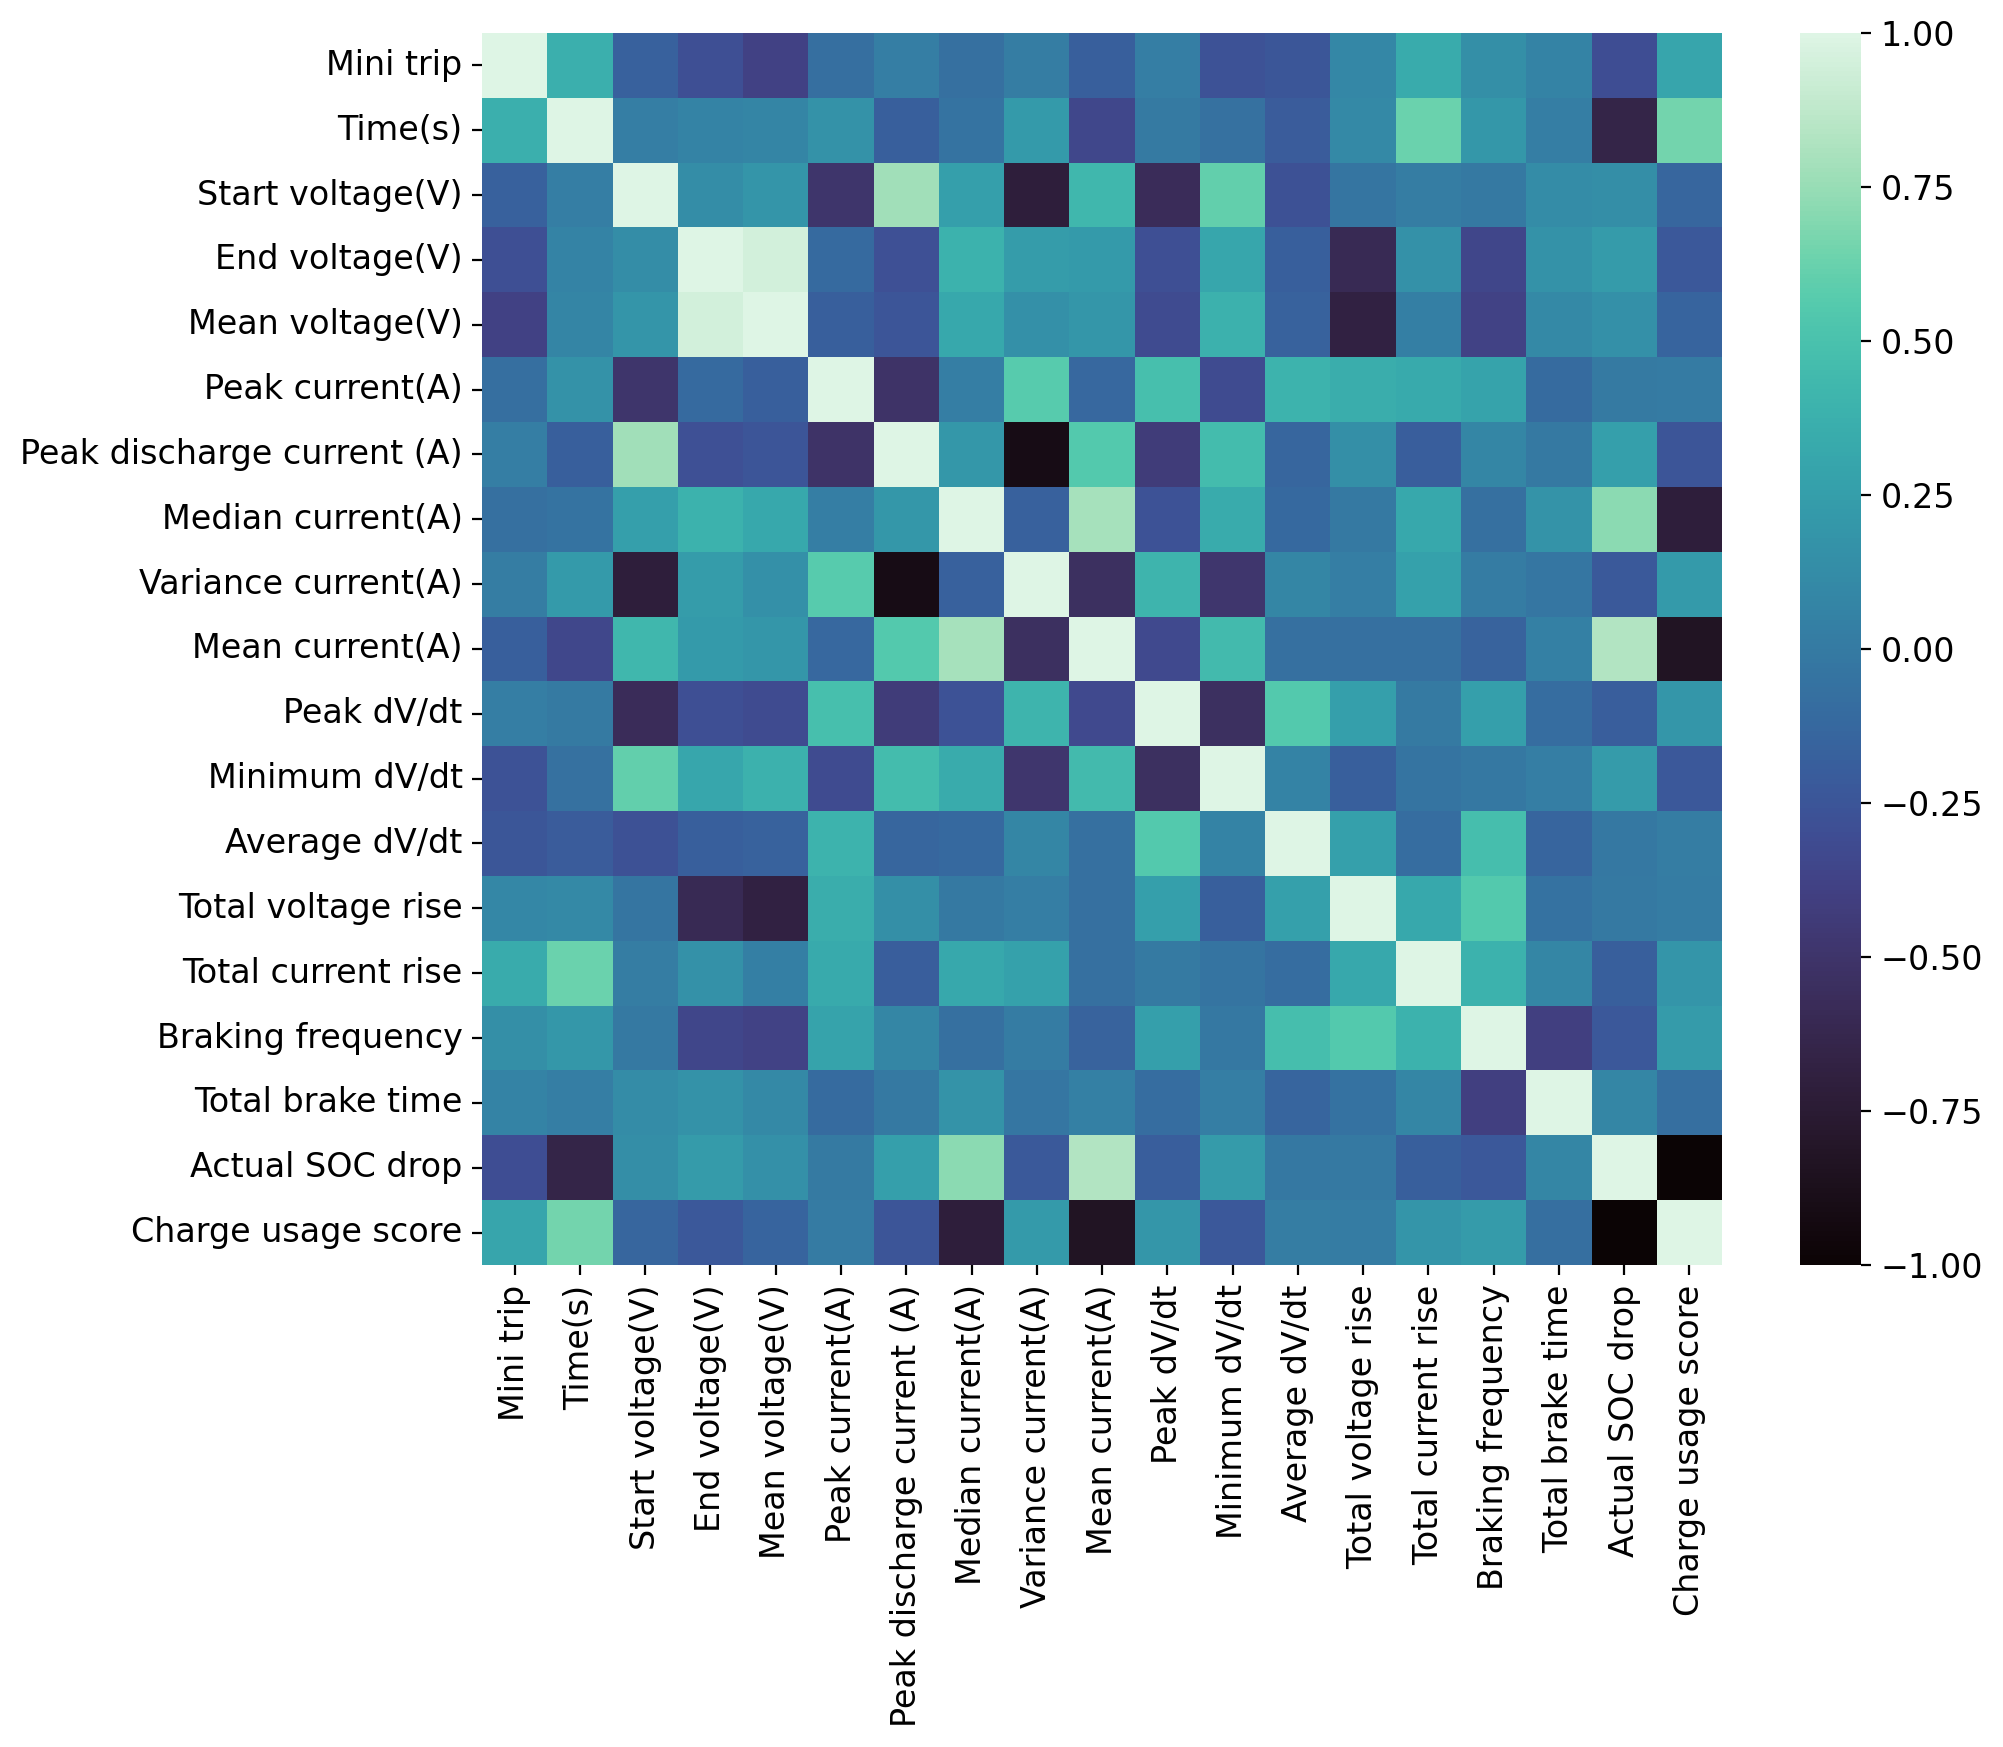

In [34]:
def corr_map(info_data_2):
    corr_mat = info_data_2.corr()
    rename_dict = {'Mini Trip' : 'Mini trip',
                   'Start Voltage(V)' : 'Start voltage(V)',
                   'End Voltage(V)' : 'End voltage(V)',
                   'Mean Voltage(V)' : 'Mean voltage(V)',
                   'Peak Current(A)' : 'Peak current(A)',
                   'Median Current(A)' : 'Median current(A)',
                   'Mean Current(A)' : 'Mean current(A)',
                   'Variance Current(A)' : 'Variance current(A)',
                   'Min dV/dt' : 'Minimum dV/dt',
                   'Avg dV/dt' : 'Average dV/dt',
                   'Total Voltage Rise' :'Total voltage rise',
                   'Total Current Rise' : 'Total current rise',
                   'Number of brakes': 'Braking frequency',
                   'SOC_drop (%)': 'Actual SOC drop',
                   'Peak Min_dis Current(A)' : 'Peak discharge current (A)',
                   'Relative_SOC_drop' : 'Charge usage score'
                }
    
    corr_mat = corr_mat.rename(index=rename_dict, columns=rename_dict)
    sns.reset_orig()
    plt.rcdefaults()
    plt.rcParams['font.size'] = 12
    plt.rcParams['figure.figsize'] = (10, 8)

    sns.heatmap(corr_mat,
                cmap="mako",
                fmt=".2f",
                vmin=-1,
                vmax=1)
    
    # plt.title("Feature Correlation Heatmap for Current Data without classification features")
    plt.show()
corr_map(info_data_2)

#### Charge usage score heatmap

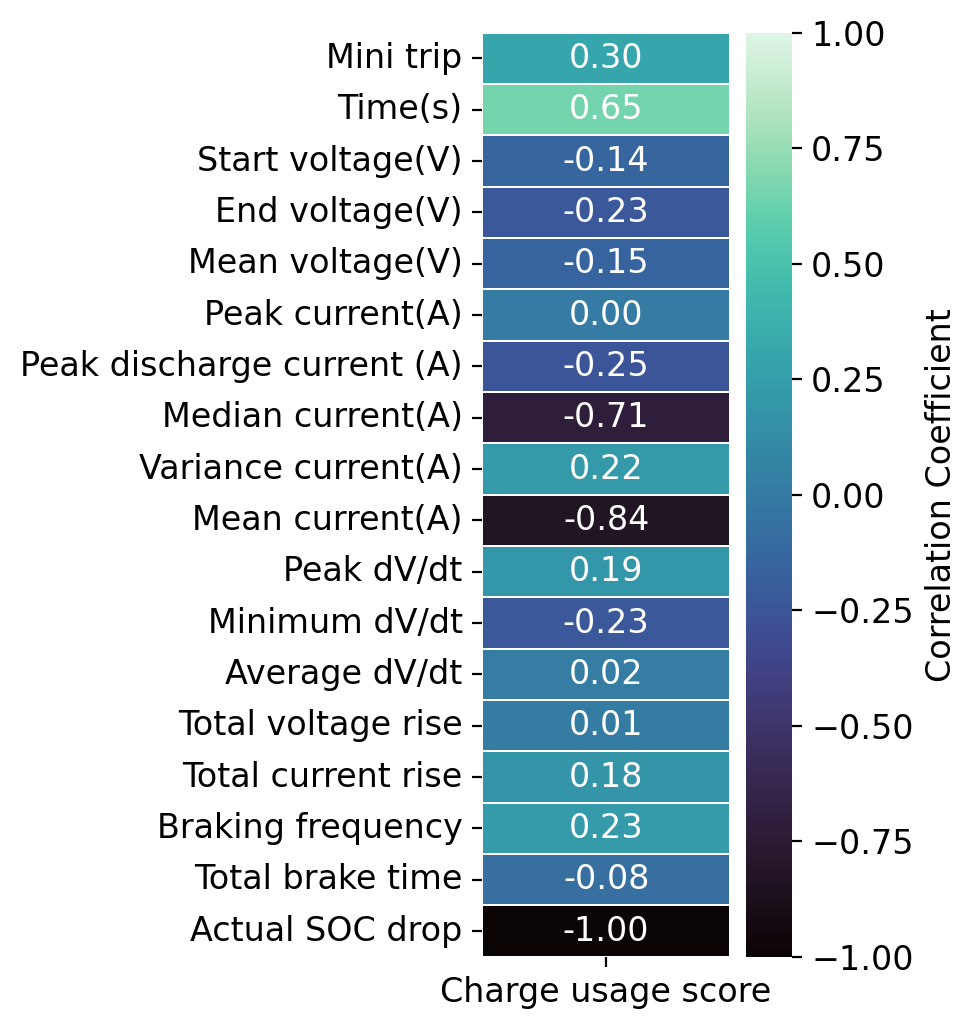

In [38]:
def corr_map(info_data_2):
    last_column = info_data_2.iloc[:, -1]
    corr_mat = info_data_2.corr()
    target_corr= corr_mat[['Relative_SOC_drop']].drop(['Relative_SOC_drop'], axis=0) 

    rename_dict = {'Mini Trip' : 'Mini trip',
                   'Start Voltage(V)' : 'Start voltage(V)',
                   'End Voltage(V)' : 'End voltage(V)',
                   'Mean Voltage(V)' : 'Mean voltage(V)',
                   'Peak Current(A)' : 'Peak current(A)',
                   'Median Current(A)' : 'Median current(A)',
                   'Mean Current(A)' : 'Mean current(A)',
                   'Variance Current(A)' : 'Variance current(A)',
                   'Min dV/dt' : 'Minimum dV/dt',
                   'Avg dV/dt' : 'Average dV/dt',
                   'Total Voltage Rise' :'Total voltage rise',
                   'Total Current Rise' : 'Total current rise',
                   'Number of brakes': 'Braking frequency',
                    'SOC_drop (%)': 'Actual SOC drop',
                    'Peak Min_dis Current(A)' : 'Peak discharge current (A)'
                }

    target_corr.columns = ['Charge usage score']  # Rename x-axis label
    target_corr.index = target_corr.index.to_series().replace(rename_dict)

    sns.reset_orig()
    plt.rcdefaults()
    plt.rcParams['font.size'] = 12
    plt.rcParams['figure.figsize'] = (2, 6)

    fig, ax = plt.subplots()
    sns.heatmap(target_corr,     
                annot=True,
                cmap="mako",
                fmt=".2f",
                vmin=-1,
                vmax=1,
                linewidths=0.01,
                annot_kws={"color": "white"},  
                cbar_kws={"label": "Correlation Coefficient"} , cbar = True)
    fig.savefig(PLOT_DIR / 'correlation_current.svg', format='svg', dpi=2000, bbox_inches='tight')
    plt.show()

corr_map(info_data_2)

In [36]:
vel_info= pd.read_csv(MISC_DIR / 'velocity_data.csv')